In [41]:
import pandas as pd
import ast
from itertools import chain
import matplotlib.pyplot as plt


In [56]:
df = pd.read_excel('metaculus.xlsx')

In [50]:
ogdf.head()

,Unnamed: 0,url,page_url,title,close_time,desc,resc,fp,type,categories,pred1,pred2
0,0,https://www.metaculus.com/api2/questions/111/,https://www.metaculus.com/questions/111/will-t...,Will there be a total solar eclipse on June 25...,2522-06-23T23:00:00Z,NaN,"According to [NASA], as of question writing th...",NaN,QUESTION,"['environment & climate', 'natural sciences', ...",Total Forecasters\n306\nCommunity Prediction\n96%,NaN
1,1,https://www.metaculus.com/api2/questions/161/,https://www.metaculus.com/questions/161/will-t...,Will the Universe end?,2026-01-01T00:00:00Z,-,*Warning: you're not going to win or lose any ...,NaN,QUESTION,"['natural sciences', 'space']",Total Forecasters\n471\nCommunity Prediction\n80%,NaN
2,2,https://www.metaculus.com/api2/questions/349/,https://www.metaculus.com/questions/349/spacex...,Will SpaceX land people on Mars before 2030?,2029-12-31T23:19:37Z,[SpaceX](http://www.spacex.com) recently relea...,This question will resolve as **Yes** if a Spa...,NaN,QUESTION,"['space', 'technology']",Total Forecasters\n4.09k\nCommunity Prediction...,NaN
3,3,https://www.metaculus.com/api2/questions/353/,https://www.metaculus.com/questions/353/will-s...,Will someone born before 2001 live to be 150?,2151-01-01T01:00:00Z,-,"A [recent question,](https://www.metaculus.com...",NaN,QUESTION,['social sciences'],Total Forecasters\n1.01k\nCommunity Prediction...,NaN
4,4,https://www.metaculus.com/api2/questions/363/,https://www.metaculus.com/questions/363/will-a...,When will the first 100 Megawatt fusion-based ...,2100-01-01T16:18:00Z,Large-scale generation of electric power by nu...,To separate this from a distinct question of l...,NaN,QUESTION,"['economy & business', 'natural sciences', 'nu...",Total Forecasters\n241\nCommunity Prediction\n...,Unnamed: 0 Community\n0 lower 25% 20...


In [57]:
df = df[['title', 'desc', 'categories']]

df['desc'] = df['desc'].fillna('')
df['text'] = df['title'] + df['desc']
df = df.drop(['title', 'desc'], axis = 1)

df['categories'] = df['categories'].apply(ast.literal_eval)
unique_categories = sorted(list(set(chain.from_iterable(df['categories']))))

In [58]:
df.head()

,categories,text
0,"[environment & climate, natural sciences, spac...",Will there be a total solar eclipse on June 25...
1,"[natural sciences, space]",Will the Universe end?-
2,"[space, technology]",Will SpaceX land people on Mars before 2030?[S...
3,[social sciences],Will someone born before 2001 live to be 150?-
4,"[economy & business, natural sciences, nuclear...",When will the first 100 Megawatt fusion-based ...


In [59]:
for category in unique_categories:
    df[category] = df['categories'].apply(lambda x: int(category in x))

In [60]:
df.head()

,categories,text,artificial intelligence,computing and math,cryptocurrencies,economy & business,elections,environment & climate,geopolitics,health & pandemics,law,metaculus,natural sciences,nuclear technology & risks,politics,social sciences,space,sports & entertainment,technology
0,"[environment & climate, natural sciences, spac...",Will there be a total solar eclipse on June 25...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,"[natural sciences, space]",Will the Universe end?-,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,"[space, technology]",Will SpaceX land people on Mars before 2030?[S...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,[social sciences],Will someone born before 2001 live to be 150?-,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,"[economy & business, natural sciences, nuclear...",When will the first 100 Megawatt fusion-based ...,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1


In [61]:
columns = df.columns
category_freq = df[columns[3:]].sum()/df.shape[0]

category_freq

computing and math            0.141453
cryptocurrencies              0.009826
economy & business            0.287249
elections                     0.090037
environment & climate         0.082952
geopolitics                   0.195612
health & pandemics            0.060101
law                           0.023766
metaculus                     0.003199
natural sciences              0.073812
nuclear technology & risks    0.036106
politics                      0.180987
social sciences               0.037249
space                         0.061015
sports & entertainment        0.045475
technology                    0.154936
dtype: float64

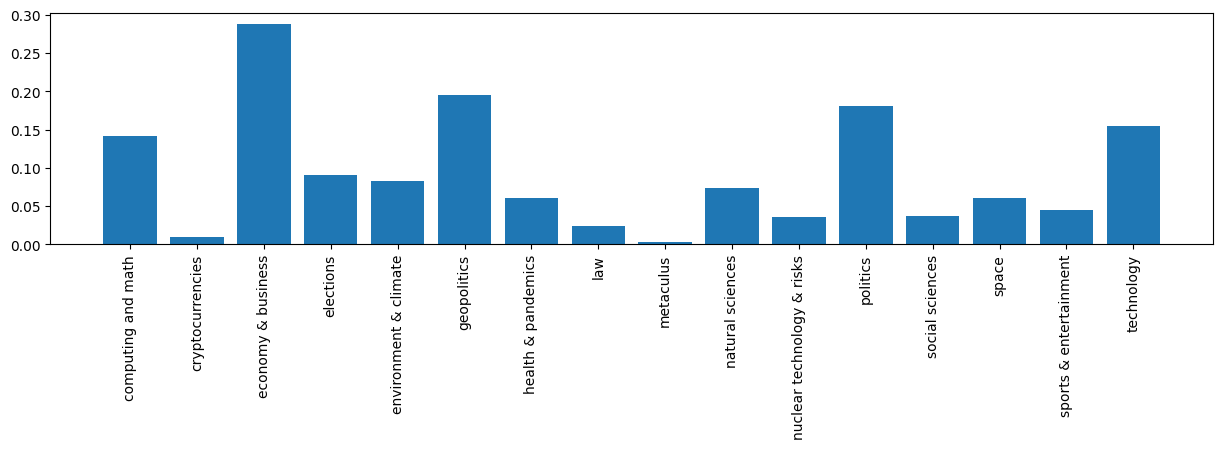

In [62]:
plt.rcParams["figure.figsize"] = (15,3)
plt.bar(category_freq.index, category_freq.values)
_ = plt.xticks(rotation = 90)

In [63]:
df.to_excel('dataset.xlsx')